## Importing the libraries

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing the dataset

In [128]:
dataset = pd.read_csv('Train.csv')
X = dataset.iloc[:,1:-1]
y = dataset.iloc[:,-1]

## Handling Missing Values

In [129]:
X.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [130]:
y.isnull().sum()

0

In [131]:
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(missing_values=np.nan, strategy='mean') 
imputer1.fit(X[['Item_Weight']])
X[['Item_Weight']] = imputer1.transform(X[['Item_Weight']])
imputer2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent') 
imputer2.fit(X[['Outlet_Size']])
X[['Outlet_Size']] = imputer2.transform(X[['Outlet_Size']])

In [132]:
print(pd.isnull(X).sum())
X.dtypes

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

## Outlier

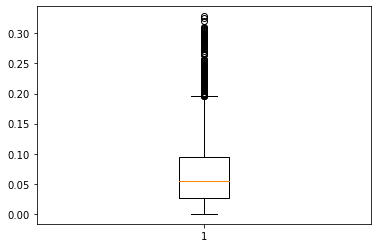

In [133]:
plt.boxplot(X['Item_Visibility'])
plt.show()

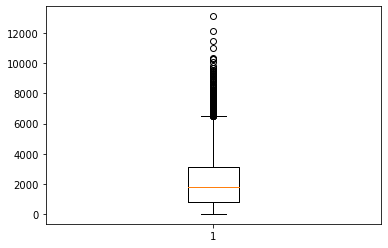

In [134]:
plt.boxplot(y)
plt.show()

In [135]:
y=y.values
y=y.reshape(-1,1)

In [136]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
y=sc.fit_transform(y)

## encoding 


In [137]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
oh1 =OneHotEncoder(handle_unknown="ignore")
ct1 = ColumnTransformer(transformers = [('encoder',oh1,[1,3,9])], remainder ='passthrough')
X = np.array(ct1.fit_transform(X))

In [138]:
oh2 =OneHotEncoder(handle_unknown="ignore")
ct2= ColumnTransformer(transformers = [('encoder', oh2,[28])], remainder ='passthrough')
X = np.array(ct2.fit_transform(X))

In [139]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
X[:,39] = le1.fit_transform(X[:,39])
X[:,40] = le2.fit_transform(X[:,40])

## Splitting the dataset into the Training set and Test set

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## LinearRegression

In [141]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [142]:
y_pred=regressor.predict(X_test)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
y_test = sc.inverse_transform(y_test)
y_pred = sc.inverse_transform(y_pred)
print("mae",mean_absolute_error(y_test, y_pred))
print("mse",mean_squared_error(y_test, y_pred))
print("Rmse",np.sqrt(mean_squared_error(y_test, y_pred)))

mae 792.0012172993
mse 1143836.323097761
Rmse 1069.502839219121


## RandomForestRegressor

In [143]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state = 42)
regressor.fit(X_train, y_train)

C:\Users\Ruby\AppData\Local\Temp/ipykernel_15632/817261776.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [144]:
y_pred=regressor.predict(X_test)
y_pred = sc.inverse_transform(y_pred)
print("mae",mean_absolute_error(y_test, y_pred))
print("mse",mean_squared_error(y_test, y_pred))
print("Rmse",np.sqrt(mean_squared_error(y_test, y_pred)))

mae 752.7751878134897
mse 1165089.5143574837
Rmse 1079.3931231750014


## SVM


In [145]:
from sklearn.svm import SVR
regressor = SVR(kernel= 'rbf')
regressor.fit(X_train, y_train)

c:\Users\Ruby\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [146]:
y_pred=regressor.predict(X_test)
y_pred = sc.inverse_transform(y_pred)
print("mae",mean_absolute_error(y_test, y_pred))
print("mse",mean_squared_error(y_test, y_pred))
print("Rmse",np.sqrt(mean_squared_error(y_test, y_pred)))

mae 989.1315072602065
mse 1822695.3980790996
Rmse 1350.072367719264


## PRED ON TEST

In [147]:
test = pd.read_csv('Test.csv').iloc[:,1:]

In [148]:
pd.DataFrame(test).isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [149]:
test[['Item_Weight']] = imputer1.transform(test[['Item_Weight']])
test[['Outlet_Size']] = imputer2.transform(test[['Outlet_Size']])

In [150]:
pd.DataFrame(test).isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [151]:
test = np.array(ct1.transform(test))
test = np.array(ct2.transform(test))

In [152]:
test[:,39] = le1.transform(test[:,39])
test[:,40] = le2.transform(test[:,40])

In [153]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state = 42)
regressor.fit(X, y)

C:\Users\Ruby\AppData\Local\Temp/ipykernel_15632/2306707147.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, y)


RandomForestRegressor(random_state=42)

In [154]:
y_test_pred = regressor.predict(test)

In [155]:
y_test_pred = sc.inverse_transform(y_test_pred)

In [156]:
pd.DataFrame(y_test_pred).head(15)

,0
0,1816.548746
1,1206.782474
2,551.515430
3,2367.691328
4,6383.963378
5,1993.864602
6,651.884780
7,1638.367350
8,1023.314626
9,2602.625516


In [157]:
final = pd.read_csv('Test.csv')
final['Item_Outlet_Sales']=y_test_pred
#final=final.drop(['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis=1)
final.to_csv("Final_Test_Pred.csv",index=False)